# Importing Libraries

In [303]:
import pandas as pd
import numpy as np

# Importing Dataset

In [304]:
# Read the data
df = pd.read_csv('heart.csv')
target = df['HeartDisease']
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [305]:
df.shape

(918, 12)

# Checking Missing Data

Handling missing data is an important step in the data preprocessing process, as missing data can have a significant impact on the quality and performance of the final model. There are several strategies for dealing with missing data, each with their own advantages and disadvantages. Here are a few common strategies:

Deletion: The simplest way to handle missing data is to simply delete the rows or columns that contain missing values. This approach is known as listwise deletion or complete case analysis. However, this approach can result in a loss of information and can cause bias if the missing data is not missing at random.

Imputation: Another strategy for dealing with missing data is to impute the missing values with a substitute value. This could be a mean, median, or mode of the non-missing values, or a value predicted by another model. This approach can be useful when the amount of missing data is small, but it can also introduce bias if the imputed values are not representative of the true values.

Multiple Imputation: To overcome the drawback of imputation, we can use multiple imputation technique. In this technique, we create multiple datasets by imputing the missing values in different ways. By creating multiple datasets, we can account for the uncertainty in the imputed values.

Predictive modeling: We can also use machine learning models to predict the missing values, this approach is known as "predictive modeling" or "pattern substitution". This approach requires a lot of data, and it's more complex than the other methods. But it can be very effective when the data is missing at random.
Using Algorithms that can handle missing data: There are some machine learning algorithms that can handle missing data natively, such as decision tree and random forest. By using these algorithms, we don't need to handle missing data separately.

When computing missing data, the choice of whether to use the mean, median, or mode will depend on the specific characteristics of the data and the problem being solved.

Mean: The mean is the average of all the values in a dataset and it is computed by summing all the values and dividing by the number of values. It is a good choice to use when the data is roughly normally distributed and there are no outliers. However, it can be sensitive to outliers and can give skewed results if the data is not normally distributed.

Median: The median is the middle value of a dataset when it is ordered. It is a good choice to use when the data is skewed or has outliers, as it is not affected by extreme values. It's a robust measure of central tendency.

Mode: The mode is the most frequently occurring value in a dataset. It is a good choice to use when the data is categorical and the problem is related to classification. It's also good to use when the data is not normally distributed.

In [306]:
# check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Checking for Outliers


Visualization: One of the simplest ways to check for outliers is to create a visual representation of the data, such as a scatter plot or box plot. This can be done using the matplotlib and seaborn libraries in Python. Outliers will appear as points that are far away from the main cluster of points.

Z-score: The Z-score is a measure of how many standard deviations a data point is from the mean. A common rule of thumb is to consider a data point an outlier if its Z-score is greater than 3 or less than -3. This can be done using the scipy.stats library in Python.

Interquartile range (IQR): The IQR is a measure of the spread of the middle 50% of the data. A data point can be considered an outlier if it is more than 1.5 times the IQR below the first quartile or above the third quartile. This can be done using the pandas library in Python.

In [307]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))])

     Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    NaN  NaN           NaN        NaN          NaN        NaN        NaN   
1    NaN  NaN           NaN        NaN          NaN        NaN        NaN   
2    NaN  NaN           NaN        NaN          NaN        NaN        NaN   
3    NaN  NaN           NaN        NaN          NaN        NaN        NaN   
4    NaN  NaN           NaN        NaN          NaN        NaN        NaN   
..   ...  ...           ...        ...          ...        ...        ...   
913  NaN  NaN           NaN        NaN          NaN        NaN        NaN   
914  NaN  NaN           NaN        NaN          NaN        1.0        NaN   
915  NaN  NaN           NaN        NaN          NaN        NaN        NaN   
916  NaN  NaN           NaN        NaN          NaN        NaN        NaN   
917  NaN  NaN           NaN        NaN          NaN        NaN        NaN   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      NaN     

/var/folders/jc/n8mq5t1s4sqd_1jgd0zhl1qw0000gn/T/ipykernel_14926/694283627.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/var/folders/jc/n8mq5t1s4sqd_1jgd0zhl1qw0000gn/T/ipykernel_14926/694283627.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
/var/folders/jc/n8mq5t1s4sqd_1jgd0zhl1qw0000gn/T/ipykernel_14926/694283627.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 +

# Converting Categorical Data into Numeric Data

In [308]:
# converting categorical data to numerical data

from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# fit and transform the dataframe column
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Feature Selecting


There are several ways to check which features in a dataframe are irrelevant for a machine learning model, here are a few common methods:

Correlation: This method checks the correlation between features in the dataframe. Features that have a low correlation with the target variable are often considered irrelevant. The correlation can be calculated using the pandas library in Python.

Information Gain: This method calculates the information gain of each feature with respect to the target variable. Features with a low information gain are often considered irrelevant. The information gain can be calculated using the sklearn.feature_selection library in Python.

Recursive Feature Elimination: This method uses a machine learning model to recursively eliminate features based on their importance. Features that are not important for the model are removed. This method can be applied using the sklearn.feature_selection library in Python.

In [309]:
import pandas as pd

# calculate the correlation matrix
correlation = df.corr()

# print the correlation matrix
print(correlation)


                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

<AxesSubplot: >

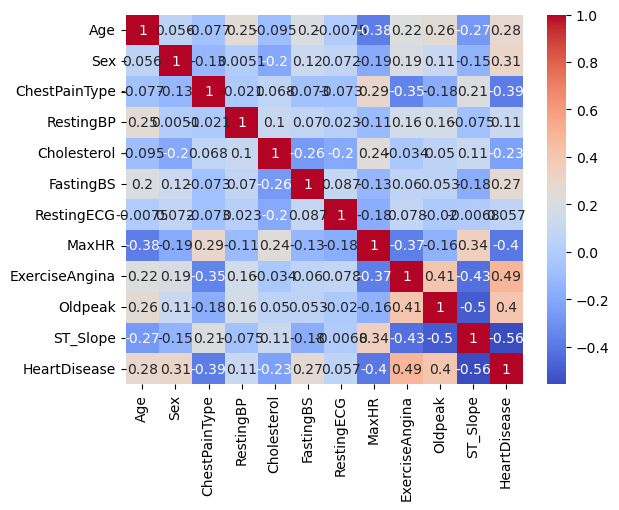

In [310]:
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [311]:
# # calculate the correlation matrix
# correlation = df.corr()

# # set the threshold for correlation coefficient
# threshold = 0.5

# # create a mask for features that have a correlation coefficient greater than the threshold
# mask = (correlation > threshold)

# # apply the mask to the correlation matrix
# filtered_correlation = correlation.where(mask)

# # drop the features that have a correlation coefficient greater than the threshold
# df = df.drop(filtered_correlation.columns, axis=1)


# Normalizing the Data

Min-Max Scaling: This method scales the data to a specific range, usually between 0 and 1. It is done by subtracting the minimum value of the data from each data point, and then dividing by the range of the data (the difference between the minimum and maximum values).

Z-Score Normalization: This method standardizes the data by transforming it such that the mean is 0 and the standard deviation is 1. It is done by subtracting the mean from each data point, and then dividing by the standard deviation.

It is important to note that standardizing the data can be useful if the data is to be used in a model that is sensitive to scale, like SVM, KNN, linear and logistic regression etc. but if data is to be used in a decision tree based model, normalizing it is not needed.

In [312]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
 
# create a scaler object
scaler = MinMaxScaler()
 
# fit and transform the data
df = scaler.fit_transform(df) 

In [313]:
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


# Data Splitting

In [314]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)
